In [1]:
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline
import lsst.sims.utils as utils

In [2]:
nside = 64
ack = np.arange(hp.nside2npix(nside))
ra, dec = utils._hpid2RaDec(nside, ack)




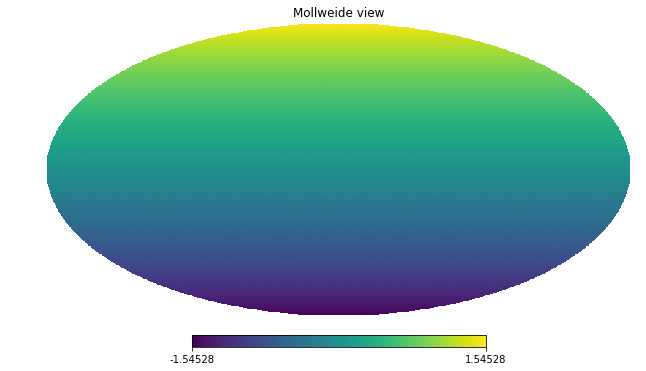

In [3]:
hp.mollview(dec)

In [4]:
def project_lambert(longitude, latitude):
    """Project from RA,dec to plane
    https://en.wikipedia.org/wiki/Lambert_azimuthal_equal-area_projection
    
    """
    
    # flipping the sign on latitude goes north pole or south pole centered
    r_polar = 2*np.cos((np.pi/2+latitude)/2.)
    theta_polar = longitude
    
    x = r_polar * np.cos(theta_polar)
    y = r_polar * np.sin(theta_polar)
    return x,y

In [5]:
x,y = project_lambert(ra, dec)

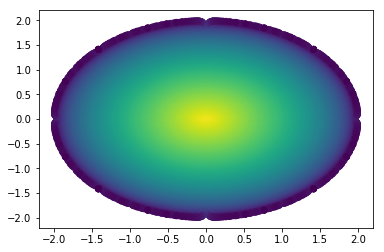

In [6]:
plt.scatter(x,y,c=dec)


In [7]:
ack = np.pi/2+dec
ack.min(), ack.max()

(0.012757845597670681, 3.1288348079921224)

([], <a list of 0 Text yticklabel objects>)

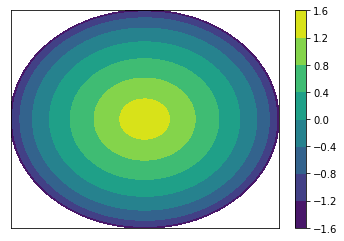

In [8]:
plt.tricontourf(x,y,dec)
cb = plt.colorbar()
frame1 = plt.gca()
#frame1.axes.xaxis.set_ticklabels([])
#frame1.axes.yaxis.set_ticklabels([])
plt.xticks([])
plt.yticks([])

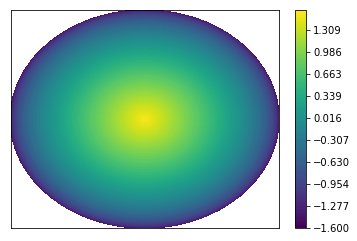

In [15]:
norm = None
levels = np.linspace(-1.6,1.6,100)
fig = plt.figure(1)
ax = fig.add_subplot(111)
tcf = ax.tricontourf(x, y, dec, levels, norm=norm)
ax.set_xticks([])
ax.set_yticks([])
cb = plt.colorbar(tcf)

In [16]:
tcf.collections

<a list of 99 mcoll.PathCollection objects>